In [3]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
restaurant = pd.read_excel(io= file)

In [4]:
restaurant.head(n=15)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147


In [5]:
# formatting and printing the dimensions of the dataset to identify the sample of data collected and variables assumed for collection of data
print(f"""
Size of Original Dataset
------------------------
Observations: {restaurant.shape[0]}
Features:     {restaurant.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [6]:
# Exploring the dataset to identify column names that might need renaming for further understanding to the business user
# column names
print(restaurant.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [7]:
# INFOrmation about each variable
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

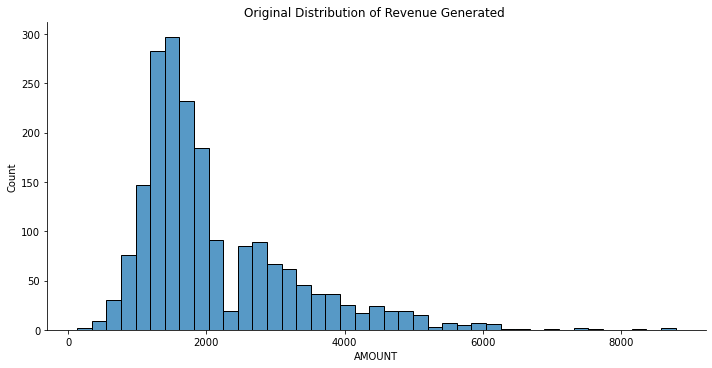

In [8]:
# developing a histogram using DISPLOT
#This is to check the skewness of  the y variable to determine if it is necessary to apply a log transformation
sns.displot(data   = restaurant,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of Revenue Generated ")
plt.xlabel(xlabel = "AMOUNT") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


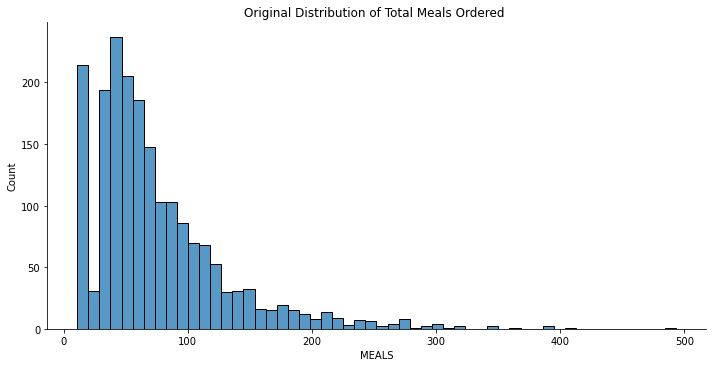

In [9]:

#This is to check the skewness of  the x variable to determine if it is necessary to apply a log transformation
sns.displot(data   = restaurant,
            x      = 'TOTAL_MEALS_ORDERED',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of Total Meals Ordered ")
plt.xlabel(xlabel = "MEALS")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


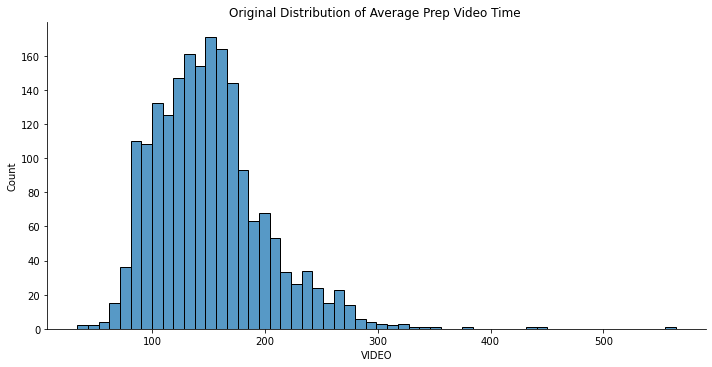

In [10]:
#This is to check the skewness of  the x variable to determine if it is necessary to apply a log transformation
sns.displot(data   = restaurant,
            x      = 'AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of Average Prep Video Time ")
plt.xlabel(xlabel = "VIDEO")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


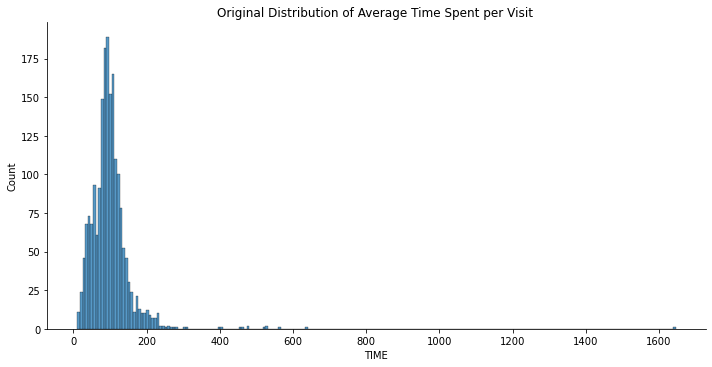

In [11]:
#This is to check the skewness of  the x variable to determine if it is necessary to apply a log transformation
sns.displot(data   = restaurant,
            x      = 'AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of Average Time Spent per Visit ")
plt.xlabel(xlabel = "TIME")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

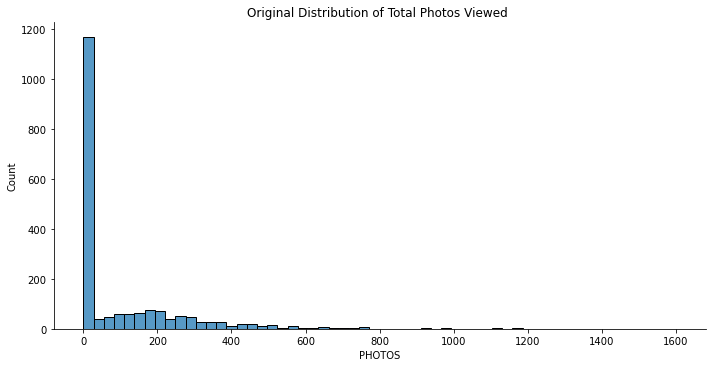

In [12]:
#This is to check the skewness of  the x variable to determine if it is necessary to apply a log transformation
sns.displot(data   = restaurant,
            x      = 'TOTAL_PHOTOS_VIEWED',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of Total Photos Viewed ")
plt.xlabel(xlabel = "PHOTOS")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [13]:
# descriptive statistics for numeric data
restaurant.describe(include = 'number').round(decimals= 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [14]:
#IDENTIFYING MISSING VALUES WITHIN OUR DATASETS IN ORDER TO TREAT THEM BEFORE HEADING INTO MODELLING
restaurant.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [15]:
# Imputation of missing values for categorical variable FAMILY_NAME where 'U' represents Unknown
fill = 'U'


# imputing 'FAMILY_NAME'
restaurant['FAMILY_NAME'] =restaurant['FAMILY_NAME'].fillna(fill)

In [16]:
restaurant.isnull().any().any()

False

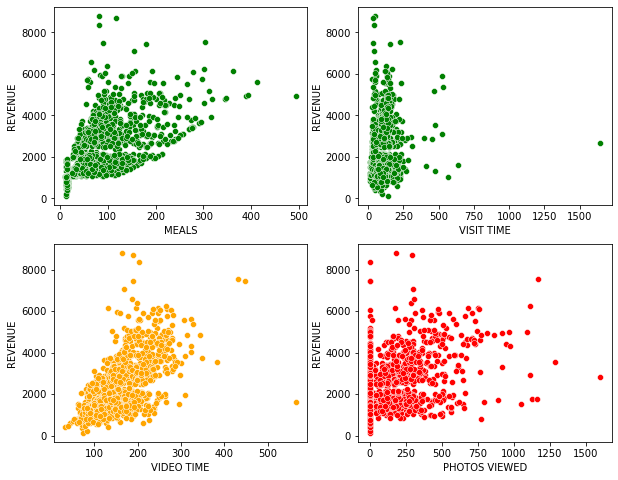

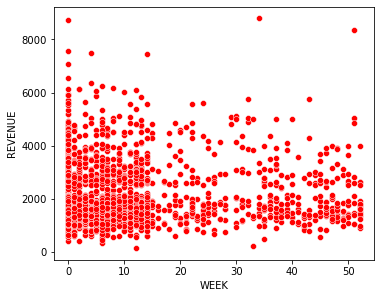

In [17]:
########################
#IN THIS PART WE IDENTIFY WHICH CONTINUOUS VARIABLES IN THE DATASET ARE AFFECTED BY A HIGH NUMBER OF ZEROES
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = restaurant['TOTAL_MEALS_ORDERED'],
                y = restaurant['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'MEALS')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = restaurant['AVG_TIME_PER_SITE_VISIT'],
                y = restaurant['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'VISIT TIME')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = restaurant['AVG_PREP_VID_TIME'],
                y = restaurant['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'VIDEO TIME')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = restaurant['TOTAL_PHOTOS_VIEWED'],
                y = restaurant['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'PHOTOS VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))
# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = restaurant['WEEKLY_PLAN'],
                y = restaurant['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'WEEK')
plt.ylabel(ylabel = 'REVENUE')
# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################





In [18]:
#With total photos viewed being the variable affected by the most amount of zeroes we now
# count the number of zeroes
photos_zeroes    = len(restaurant['TOTAL_PHOTOS_VIEWED'][restaurant['TOTAL_PHOTOS_VIEWED'] == 0])
meals_zeroes    = len(restaurant['TOTAL_MEALS_ORDERED'][restaurant['TOTAL_MEALS_ORDERED'] == 0])
weekly_zeroes    = len(restaurant['WEEKLY_PLAN'][restaurant['WEEKLY_PLAN'] == 0])
# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Total Photos             | {photos_zeroes }\t\t{len(restaurant) - photos_zeroes}
Total Meals              | {meals_zeroes }\t\t{len(restaurant) - meals_zeroes}
Total Week               | {weekly_zeroes }\t\t{len(restaurant) - weekly_zeroes}
""")


                 No		Yes
               ---------------------
Total Photos             | 1140		806
Total Meals              | 0		1946
Total Week               | 468		1478



In [19]:
#Engineering flag features for the TOTAL PHOTOS VIEWED variable which has at least 100 observations in both 'Yes' and 'No'
#column
restaurant['has_Photos']      = 0
restaurant['has_Meals']       = 0
restaurant['has_Week']        = 0

for index, value in restaurant.iterrows():
    if restaurant.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        restaurant.loc[index, 'has_Photos'] = 1
        
#MEALS ORDERED
    if restaurant.loc[index, 'TOTAL_MEALS_ORDERED'] > 20:
        restaurant.loc[index, 'has_Meals'] = 1
   #weekly plans
    if restaurant.loc[index, 'WEEKLY_PLAN'] > 0:
        restaurant.loc[index, 'has_Week'] = 1
        

In [20]:
#Checking results
restaurant[['has_Photos','has_Meals','has_Week']].head()

,has_Photos,has_Meals,has_Week
0,0,0,0
1,1,1,1
2,0,0,1
3,0,0,1
4,1,1,1


In [21]:
# developing a small correlation matrix
zeroes_corr = restaurant.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['has_Photos','has_Meals','has_Week']] \
                .sort_values(ascending = False)

has_Photos    0.372072
has_Meals     0.358802
has_Week     -0.032196
Name: REVENUE, dtype: float64

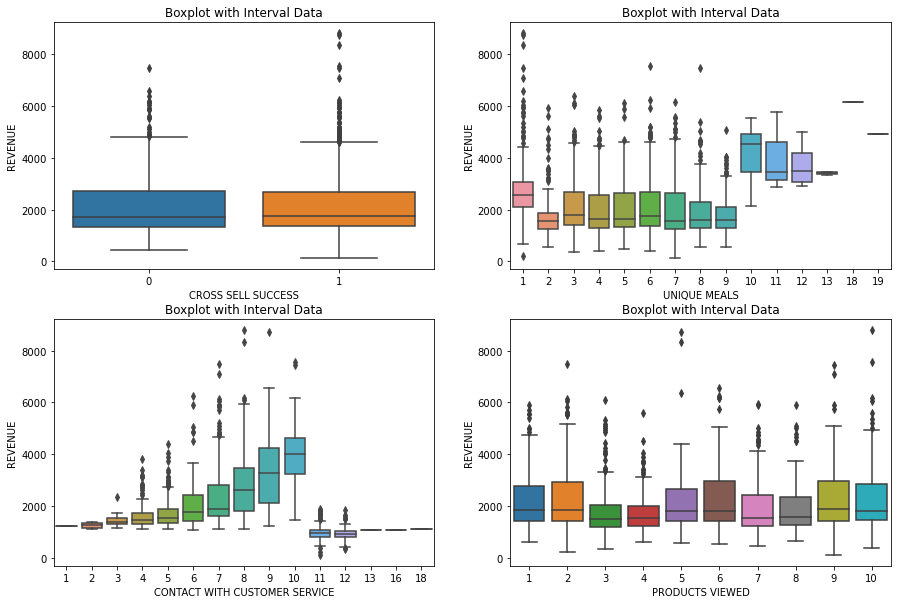

In [22]:
#Developing boxplots for each interval x variable to determine which one needs to undergo log transformation

fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x    = 'CROSS_SELL_SUCCESS',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CROSS SELL SUCCESS')
plt.ylabel(ylabel = 'REVENUE')


# developing a boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'UNIQUE MEALS')
plt.ylabel(ylabel = 'REVENUE')



# developing a boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACT WITH CUSTOMER SERVICE')
plt.ylabel(ylabel = 'REVENUE')



# developing a boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCTS VIEWED')
plt.ylabel(ylabel = 'REVENUE')






# displaying the plot
plt.show()

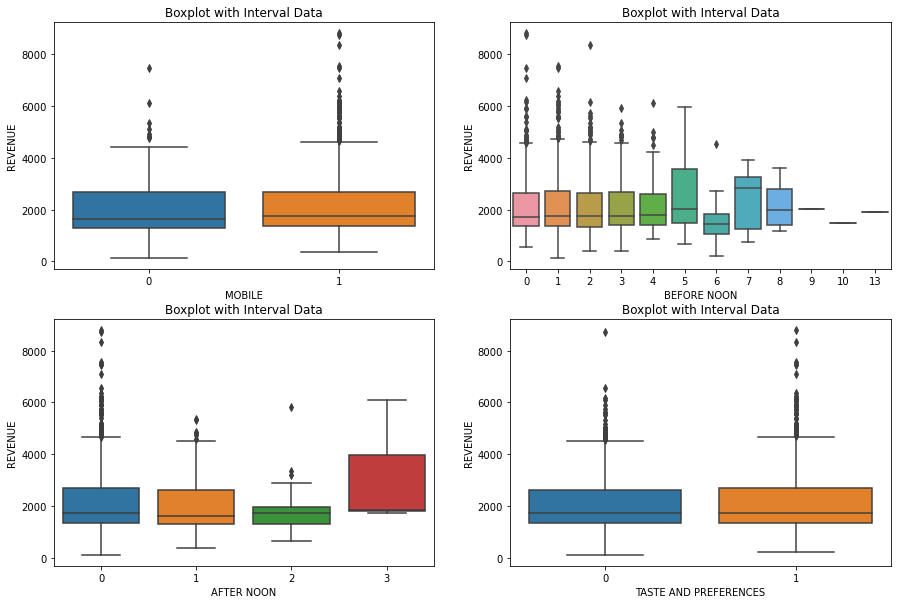

In [23]:
#Developing boxplots for each interval x variable to determine which one needs to undergo log transformation

fig, ax = plt.subplots(figsize = (15, 10))
# developing a boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x    = 'MOBILE_NUMBER',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE')
plt.ylabel(ylabel = 'REVENUE')


# developing a boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'BEFORE NOON')
plt.ylabel(ylabel = 'REVENUE')



# developing a boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'AFTER NOON')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x    = 'TASTES_AND_PREFERENCES',
                y    = 'REVENUE',
                data = restaurant)
# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'TASTE AND PREFERENCES')
plt.ylabel(ylabel = 'REVENUE')
# displaying the plot
plt.show()

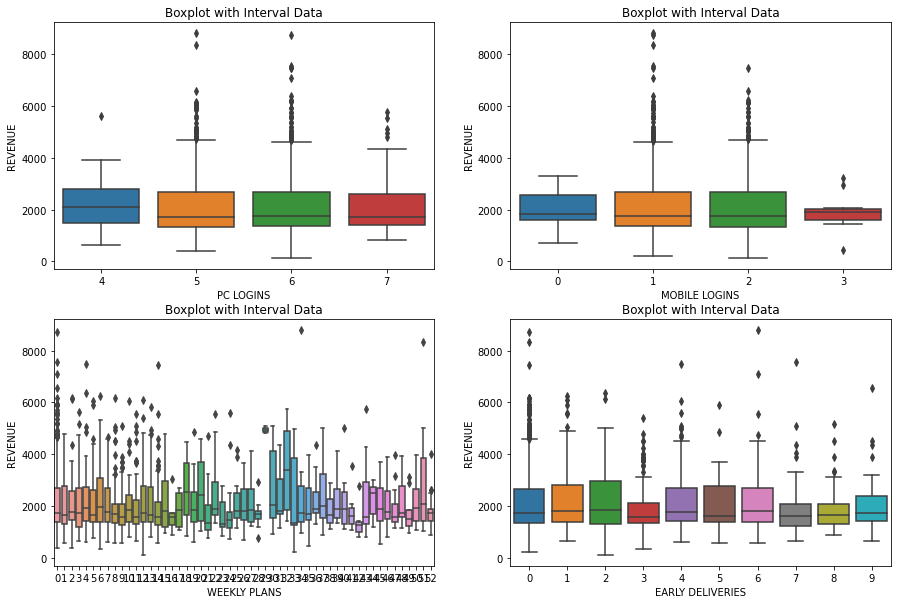

In [24]:
#Developing boxplots for each interval x variable to determine which one needs to undergo log transformation

fig, ax = plt.subplots(figsize = (15, 10))
# developing a boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x    = 'PC_LOGINS',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC LOGINS')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x    = 'MOBILE_LOGINS',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE LOGINS')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x    = 'WEEKLY_PLAN',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'WEEKLY PLANS')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x    = 'EARLY_DELIVERIES',
                y    = 'REVENUE',
                data = restaurant)
# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'EARLY DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')

# displaying the plot
plt.show()

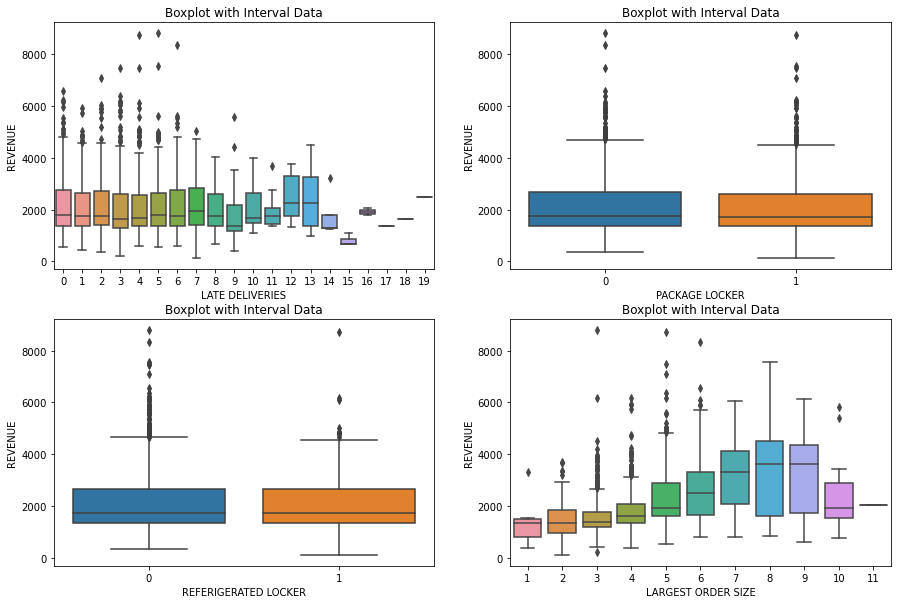

In [25]:
#Developing boxplots for each interval x variable to determine which one needs to undergo log transformation

fig, ax = plt.subplots(figsize = (15, 10))
# developing a boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x    = 'LATE_DELIVERIES',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LATE DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x    = 'PACKAGE_LOCKER',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PACKAGE LOCKER')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x    = 'REFRIGERATED_LOCKER',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'REFERIGERATED LOCKER')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LARGEST ORDER SIZE')
plt.ylabel(ylabel = 'REVENUE')

# displaying the plot
plt.show()

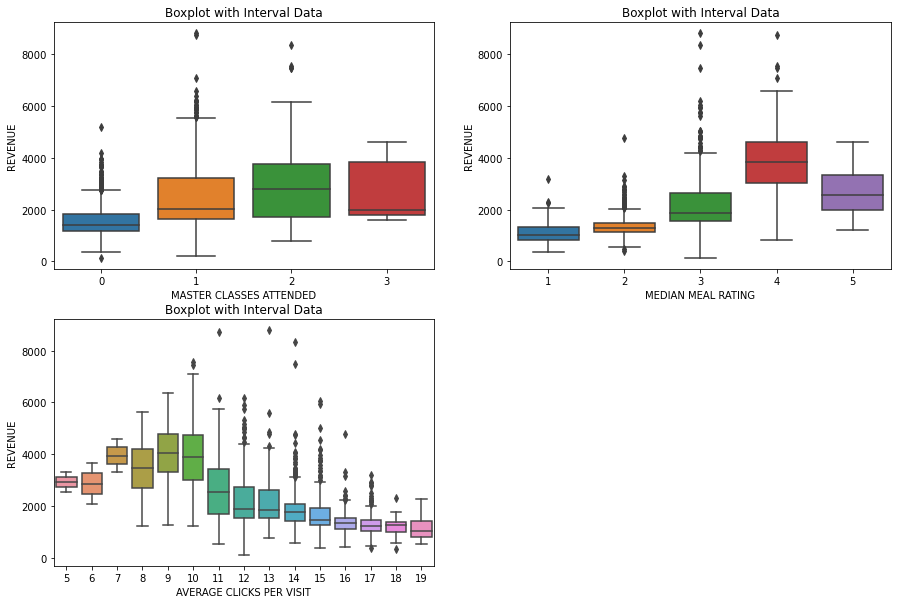

In [26]:
#Developing boxplots for each interval x variable to determine which one needs to undergo log transformation

fig, ax = plt.subplots(figsize = (15, 10))
# developing a boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MASTER CLASSES ATTENDED')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN MEAL RATING')
plt.ylabel(ylabel = 'REVENUE')

# developing a boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x    = 'AVG_CLICKS_PER_VISIT',
                y    = 'REVENUE',
                data = restaurant)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'AVERAGE CLICKS PER VISIT')
plt.ylabel(ylabel = 'REVENUE')

# displaying the plot
plt.show()

In [27]:
# log transforming REVENUE and saving it to the dataset
restaurant['log_REVENUE'] = np.log10(restaurant['REVENUE'])

In [28]:
restaurant['log_UNIQUE_MEALS_PURCH'] = np.log10(restaurant['UNIQUE_MEALS_PURCH'])


log_corr = restaurant.loc[ : , ['UNIQUE_MEALS_PURCH',
                             'log_UNIQUE_MEALS_PURCH',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['UNIQUE_MEALS_PURCH', 'log_UNIQUE_MEALS_PURCH'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
UNIQUE_MEALS_PURCH,-0.06,-0.08
log_UNIQUE_MEALS_PURCH,-0.12,-0.13


In [29]:
def log_trans (x):
    """ performs a log transformation after checking for zeros within in the column
    
    input
    x = str, column name that is supposed to be transformed
    """
    
    #check for null values and impute to 0.01 if existing
    for index, value in restaurant.iterrows():
    
        if restaurant.loc[index, x] == 0:
            restaurant.loc[index, x] = 0.01 #setting to 0.01
        
    
    # log transformation
    restaurant['log_' + x] = np.log10(restaurant[x])

In [30]:
log_trans (x='MEDIAN_MEAL_RATING')

In [31]:
log_trans (x='TOTAL_MEALS_ORDERED')

In [32]:
log_trans (x='CONTACTS_W_CUSTOMER_SERVICE')

In [33]:
log_trans (x='PRODUCT_CATEGORIES_VIEWED')

In [34]:
log_trans (x='AVG_PREP_VID_TIME')

In [35]:
log_trans (x='MASTER_CLASSES_ATTENDED')

In [36]:
restaurant.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,has_Photos,has_Meals,has_Week,log_REVENUE,log_UNIQUE_MEALS_PURCH,log_MEDIAN_MEAL_RATING,log_TOTAL_MEALS_ORDERED,log_CONTACTS_W_CUSTOMER_SERVICE,log_PRODUCT_CATEGORIES_VIEWED,log_AVG_PREP_VID_TIME,log_MASTER_CLASSES_ATTENDED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0.01,1,17,0,0,0,0,2.594393,0.778151,0.000000,1.146128,1.079181,1.00000,1.523746,-2.0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0.01,3,13,170,1,1,1,3.135133,0.477121,0.477121,1.939519,0.903090,0.90309,1.928396,-2.0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0.01,2,16,0,0,0,1,2.903090,0.845098,0.301030,1.176091,1.041393,0.69897,1.799341,-2.0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0.01,2,14,0,0,0,1,2.778151,0.778151,0.301030,1.113943,1.041393,0.69897,1.641474,-2.0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1.00,3,12,205,1,1,1,3.173186,0.903090,0.477121,1.672098,0.778151,1.00000,1.928396,0.0


In [37]:
#Exploring catergorical variable
# printing columns
print(f"""
Name
------
{restaurant['NAME'].value_counts()}


Family Name
----------
{restaurant['FAMILY_NAME'].value_counts()}


Email
-------------
{restaurant['EMAIL'].value_counts()}
""")


Name
------
Godry Farring                          1
Lord Commander Qorgyle                 1
Mallor (Knight)                        1
Rat Cook                               1
Jeyne Westerling (wife of Maegor I)    1
                                      ..
Tybolt Hetherspoon                     1
Quentin Tyrell                         1
TomToo                                 1
Grubbs                                 1
Nightingale                            1
Name: NAME, Length: 1946, dtype: int64


Family Name
----------
Frey         79
U            47
Stark        32
Lannister    29
Tyrell       28
             ..
Saan          1
the Maid      1
Bushy         1
Cuger         1
Greenhill     1
Name: FAMILY_NAME, Length: 1071, dtype: int64


Email
-------------
urswyck@exxon.com               1
grisel@aol.com                  1
cayn@yahoo.com                  1
edmyn.tully@gmail.com           1
maslyn@protonmail.com           1
                               ..
sybassion@protonmail.com

In [38]:
# creating a (Pearson) correlation matrix
df_corr = restaurant.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
log_REVENUE                        0.95
AVG_PREP_VID_TIME                  0.64
log_AVG_PREP_VID_TIME              0.63
log_TOTAL_MEALS_ORDERED            0.61
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
log_MEDIAN_MEAL_RATING             0.55
TOTAL_PHOTOS_VIEWED                0.47
log_MASTER_CLASSES_ATTENDED        0.46
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
has_Photos                         0.37
has_Meals                          0.36
log_CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_TIME_PER_SITE_VISIT            0.14
CONTACTS_W_CUSTOMER_SERVICE        0.10
PRODUCT_CATEGORIES_VIEWED          0.03
MOBILE_NUMBER                      0.03
PC_LOGINS                          0.02
CANCELLATIONS_BEFORE_NOON          0.01
log_PRODUCT_CATEGORIES_VIEWED      0.01
WEEKLY_PLAN                        0.01
TASTES_AND_PREFERENCES             0.01
CROSS_SELL_SUCCESS                 0.00


In [39]:
# creating a (Pearson) correlation matrix
df_corr = restaurant.corr().round(2)


# printing (Pearson) correlations with revenue
print(df_corr.loc['log_REVENUE'].sort_values(ascending = False))

log_REVENUE                        1.00
REVENUE                            0.95
log_TOTAL_MEALS_ORDERED            0.69
log_AVG_PREP_VID_TIME              0.67
AVG_PREP_VID_TIME                  0.65
MEDIAN_MEAL_RATING                 0.65
TOTAL_MEALS_ORDERED                0.61
log_MEDIAN_MEAL_RATING             0.61
has_Meals                          0.52
log_MASTER_CLASSES_ATTENDED        0.49
MASTER_CLASSES_ATTENDED            0.47
LARGEST_ORDER_SIZE                 0.45
TOTAL_PHOTOS_VIEWED                0.43
has_Photos                         0.39
AVG_TIME_PER_SITE_VISIT            0.14
log_CONTACTS_W_CUSTOMER_SERVICE    0.05
PRODUCT_CATEGORIES_VIEWED          0.04
MOBILE_NUMBER                      0.04
TASTES_AND_PREFERENCES             0.01
CROSS_SELL_SUCCESS                 0.01
log_PRODUCT_CATEGORIES_VIEWED      0.01
CANCELLATIONS_BEFORE_NOON          0.01
WEEKLY_PLAN                        0.01
PC_LOGINS                          0.01
MOBILE_LOGINS                     -0.01


In [40]:
# making a copy of restaurant
restaurant_explanatory = restaurant.copy()


# dropping Revenue, Name, Familyname and Email from the explanatory variable set
restaurant_explanatory = restaurant_explanatory.drop(['REVENUE',
                                                'log_REVENUE','NAME','EMAIL','FIRST_NAME','FAMILY_NAME'
                                                   ], axis = 1)


# formatting each explanatory variable for statsmodels
for val in restaurant_explanatory:
    print(f"{val} +")


CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
has_Photos +
has_Meals +
has_Week +
log_UNIQUE_MEALS_PURCH +
log_MEDIAN_MEAL_RATING +
log_TOTAL_MEALS_ORDERED +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_AVG_PREP_VID_TIME +
log_MASTER_CLASSES_ATTENDED +


In [41]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE~CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
has_Meals +
has_Week+
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
has_Photos +
log_UNIQUE_MEALS_PURCH +
log_MEDIAN_MEAL_RATING +
log_TOTAL_MEALS_ORDERED +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_AVG_PREP_VID_TIME""",          data = restaurant)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     225.7
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:21:20   Log-Likelihood:                 1780.9
No. Observations:                1946   AIC:                            -3496.
Df Residuals:                    1913   BIC:                            -3312.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.7401      0.136     12.784      0.000       1.473       2.007
CROSS_SELL_SUCCESS                 -0.0129      0.005     -2.638      0.008      -0.023      -0.003
TOTAL_MEALS_ORDERED                -0.0002      0.000     -1.163      0.245      -0.000       0.000
UNIQUE_MEALS_PURCH                  0.0500      0.003     17.804      0.000       0.044       0.055
CONTACTS_W_CUSTOMER_SERVICE         0.0380      0.006      5.955      0.000       0.026       0.051
PRODUCT_CATEGORIES_VIEWED           0.0104      0.003      4.080      0.000       0.005       0.015
AVG_TIME_PER_SITE_VISIT          4.946e-05   3.86e-05      1.280      0.201   -2.63e-05       0.000
MOBILE_NUMBER                       0.0045      0.007      0.660      0.509      -0.009       0.018
CANCELLATIONS_BEFORE_NOON           0.0002      0.001      0.133      0.894      -0.003       0.003
CANCELLATIONS_AFTER_NOON           -0.0077      0.005     -1.488      0.137      -0.018       0.002
TASTES_AND_PREFERENCES              0.0089      0.005      1.785      0.074      -0.001       0.019
PC_LOGINS                          -0.0017      0.004     -0.452      0.651      -0.009       0.006
has_Meals                           0.2143      0.019     11.183      0.000       0.177       0.252
has_Week                           -0.0131      0.006     -2.212      0.027      -0.025      -0.001
MOBILE_LOGINS                      -0.0026      0.004     -0.604      0.546      -0.011       0.006
WEEKLY_PLAN                         0.0001      0.000      0.748      0.455      -0.000       0.001
EARLY_DELIVERIES                   -0.0009      0.001     -0.925      0.355      -0.003       0.001
LATE_DELIVERIES                 -2.896e-05      0.001     -0.036      0.972      -0.002       0.002
PACKAGE_LOCKER                     -0.0063      0.005     -1.182      0.237      -0.017       0.004
REFRIGERATED_LOCKER                -0.0094      0.008     -1.172      0.241      -0.025       0.006
AVG_PREP_VID_TIME                   0.0004      0.000      2.021      0.043    1.22e-05       0.001
LARGEST_ORDER_SIZE                 -0.0147      0.003     -5.870      0.000      -0.020      -0.010
MASTER_CLASSES_ATTENDED             0.0246      0.004      5.940      0.000       0.016       0.033
MEDIAN_MEAL_RATING                  0.1325      0.017      7.992      0.000       0.100       0.165
AVG_CLICKS_PER_VISIT                0.0002      0.002      0.110      0.913      -0.004       0.004
TOTAL_PHOTOS_VIEWED              5.145e-05   1.87e-05      2.747      0.006    1.47e-05    8.82e-05
has_Photos                          0.0174      0.007      2.622      0.009       0.004       0.030
log_UNIQUE_MEALS_PURCH             -0.5969      0.026    -23.167      0.000      -0

In [42]:
# declaring set of x-variables
x_variables = ['PRODUCT_CATEGORIES_VIEWED','log_UNIQUE_MEALS_PURCH','TASTES_AND_PREFERENCES',
               'LARGEST_ORDER_SIZE','MOBILE_NUMBER','CROSS_SELL_SUCCESS',
               'log_MASTER_CLASSES_ATTENDED','AVG_TIME_PER_SITE_VISIT', 'MEDIAN_MEAL_RATING', 'TOTAL_PHOTOS_VIEWED',
               'has_Photos','has_Meals','CONTACTS_W_CUSTOMER_SERVICE', 'log_TOTAL_MEALS_ORDERED',
             'AVG_PREP_VID_TIME' ]


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

PRODUCT_CATEGORIES_VIEWED +
log_UNIQUE_MEALS_PURCH +
TASTES_AND_PREFERENCES +
LARGEST_ORDER_SIZE +
MOBILE_NUMBER +
CROSS_SELL_SUCCESS +
log_MASTER_CLASSES_ATTENDED +
AVG_TIME_PER_SITE_VISIT +
MEDIAN_MEAL_RATING +
TOTAL_PHOTOS_VIEWED +
has_Photos +
has_Meals +
CONTACTS_W_CUSTOMER_SERVICE +
log_TOTAL_MEALS_ORDERED +
AVG_PREP_VID_TIME +


In [47]:
# dropping Revenue, Name, Familyname and Email from the explanatory variable set
restaurant_data = restaurant.drop(['REVENUE',
                                                'log_REVENUE','NAME','EMAIL','FIRST_NAME','FAMILY_NAME'
                                                   ], axis = 1)

ols_data   = restaurant.loc[ : , x_variables]
# preparing response variable data
restaurant_target = restaurant.loc[ : , 'REVENUE']
log_restaurant_target = restaurant.loc[:,'log_REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            restaurant_data,
            log_restaurant_target,
            test_size = 0.25,
            random_state = 219)


#OLS p-value x-dataset (normal Y)
#x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            #ols_data,         # x-variables
            #log_restaurant_target,   # y-variable
            #test_size = 0.25,
            #random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")



Training Data
-------------
X-side: (1459, 33)
y-side: (1459,)


Testing Data
------------
X-side: (487, 33)
y-side: (487,)



In [48]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = restaurant.loc[ : , x_variables]

# Preparing the target variable
log_restaurant_target = restaurant.loc[ : , 'log_REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            restaurant_data,     # x-variables
           log_restaurant_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_restaurant_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [49]:
#Developing an model using OLS Regression
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


OLS Training Score : 0.7427
OLS Testing Score  : 0.751
OLS Train-Test Gap : 0.0083


In [44]:
# zipping each feature name to its coefficient
lr_model_values = zip(restaurant_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.42)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('log_UNIQUE_MEALS_PURCH', -0.17)
('TASTES_AND_PREFERENCES', 0.01)
('LARGEST_ORDER_SIZE', -0.01)
('MOBILE_NUMBER', 0.0)
('CROSS_SELL_SUCCESS', -0.02)
('log_MASTER_CLASSES_ATTENDED', 0.02)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MEDIAN_MEAL_RATING', 0.06)
('TOTAL_PHOTOS_VIEWED', 0.0)
('has_Photos', 0.01)
('has_Meals', 0.21)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02)
('log_TOTAL_MEALS_ORDERED', 0.17)
('AVG_PREP_VID_TIME', 0.0)


Bayesian Automatic Relevance Determination (ARD)

In [45]:
#Developing a model using ARD
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)
                                         


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_OLS)


print('ARD Training Score :', ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('ARD Testing Score  :', ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score : 0.6979
ARD Testing Score  : 0.7012
ARD Train-Test Gap : 0.0033


In [46]:
# zipping each feature name to its coefficient
ard_model_values = zip(restaurant_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 2.4)
('CROSS_SELL_SUCCESS', 0.0)
('TOTAL_MEALS_ORDERED', -0.16629)
('UNIQUE_MEALS_PURCH', 0.00856)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.01419)
('MOBILE_NUMBER', 0.03113)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.07379)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.02741)
('MOBILE_LOGINS', 0.21491)
('WEEKLY_PLAN', 0.02659)
('EARLY_DELIVERIES', 0.23314)
('LATE_DELIVERIES', 0.0)


In [47]:


# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 2.4)
('TOTAL_MEALS_ORDERED', -0.16629)
('UNIQUE_MEALS_PURCH', 0.00856)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.01419)
('MOBILE_NUMBER', 0.03113)
('CANCELLATIONS_AFTER_NOON', 0.07379)
('PC_LOGINS', 0.02741)
('MOBILE_LOGINS', 0.21491)
('WEEKLY_PLAN', 0.02659)
('EARLY_DELIVERIES', 0.23314)


In [48]:
# comparing results

print(f"""
Model      Train Score                  Test Score
-----      -----------                  ----------
OLS         {lr_train_score}          {lr_test_score}
ARD                {ard_train_score}          {ard_test_score}
               """)


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'ARD'],
           
    'Training' : [lr_train_score, ard_train_score],
           
    'Testing'  : [lr_test_score, ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst),len(ard_model_lst)],
                    
    'Model' : [lr_model_lst,ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)





Model      Train Score                  Test Score
-----      -----------                  ----------
OLS         0.7427          0.751
ARD                0.6979          0.7012
               


In [49]:
model_performance = {
    
    'Model Type'    : ['OLS','ARD'],
           
    'Training' : [lr_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, ard_model_lst]}

model_performance = pd.DataFrame(model_performance)
print(f"""{model_performance}

My final model is OLS!""")

  Model Type  Training  Testing  Train-Test Gap  Model Size                                              Model
0        OLS    0.7427   0.7510          0.0083          16  [(intercept, 2.42), (PRODUCT_CATEGORIES_VIEWED...
1        ARD    0.6979   0.7012          0.0033          11  [(intercept, 2.4), (TOTAL_MEALS_ORDERED, -0.16...

My final model is OLS!


In [50]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [54]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'x_sig'      :['PRODUCT_CATEGORIES_VIEWED','log_UNIQUE_MEALS_PURCH','TASTES_AND_PREFERENCES',
               'LARGEST_ORDER_SIZE','MOBILE_NUMBER','CROSS_SELL_SUCCESS',
               'log_MASTER_CLASSES_ATTENDED','AVG_TIME_PER_SITE_VISIT', 'MEDIAN_MEAL_RATING', 'TOTAL_PHOTOS_VIEWED',
               'has_Photos','has_Meals','CONTACTS_W_CUSTOMER_SERVICE', 'log_TOTAL_MEALS_ORDERED',
             'AVG_PREP_VID_TIME' ]
}